Data analysis & data visualisation

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Titanic

In [62]:
training_data= pd.read_csv("Dataset/Titanic/train.csv")
test_data=pd.read_csv("Dataset/Titanic/test.csv")
output_data=pd.read_csv("Dataset/Titanic/gender_submission.csv")

print(training_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [63]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Visualisation of Relationship between input and different input

<Axes: xlabel='Survived', ylabel='count'>

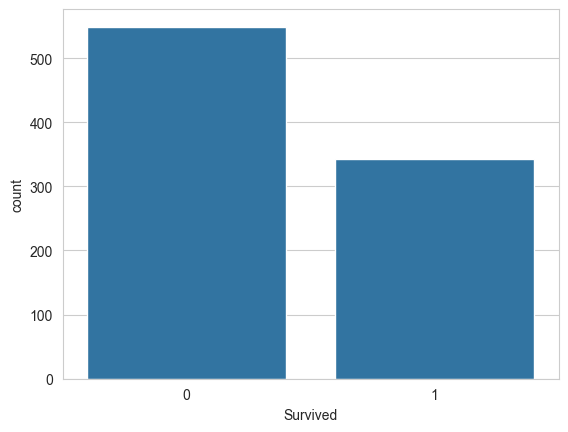

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=training_data)


<Axes: xlabel='Embarked', ylabel='count'>

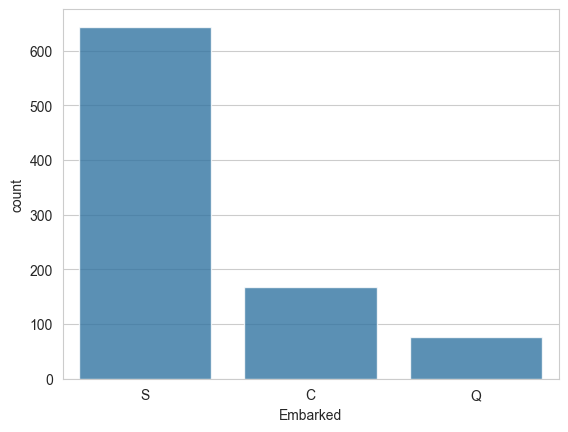

In [67]:
sns.countplot(x='Embarked',data=training_data,alpha=0.8)


find missing values in 'Embarked' column

In [68]:
filtered_data = training_data[~training_data['Embarked'].isin(['C', 'S', 'Q'])]
filtered_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [69]:
Embarked_mode=training_data['Embarked'].mode()[0]
training_data['Embarked'].fillna(value=Embarked_mode,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13208\2014757872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data['Embarked'].fillna(value=Embarked_mode,inplace=True)


<Axes: xlabel='Survived', ylabel='count'>

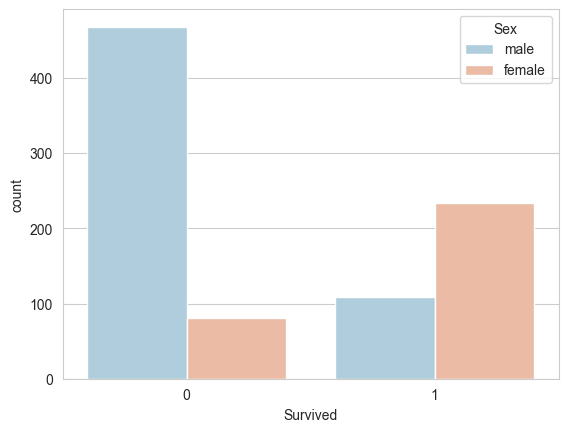

In [70]:
sns.countplot(x='Survived',data=training_data,hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

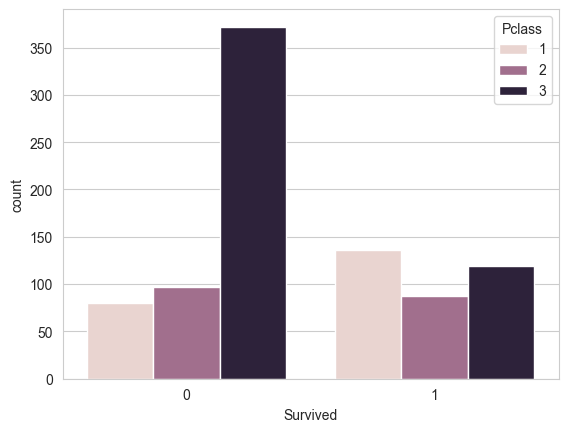

In [71]:
sns.countplot(x='Survived',hue='Pclass',data=training_data)

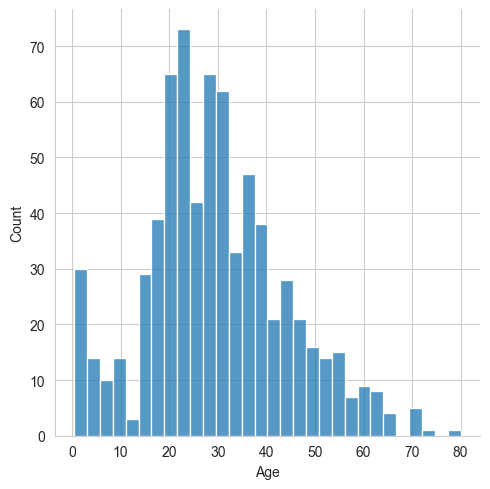

In [72]:
sns.displot(training_data['Age'],kde=False,bins=30)

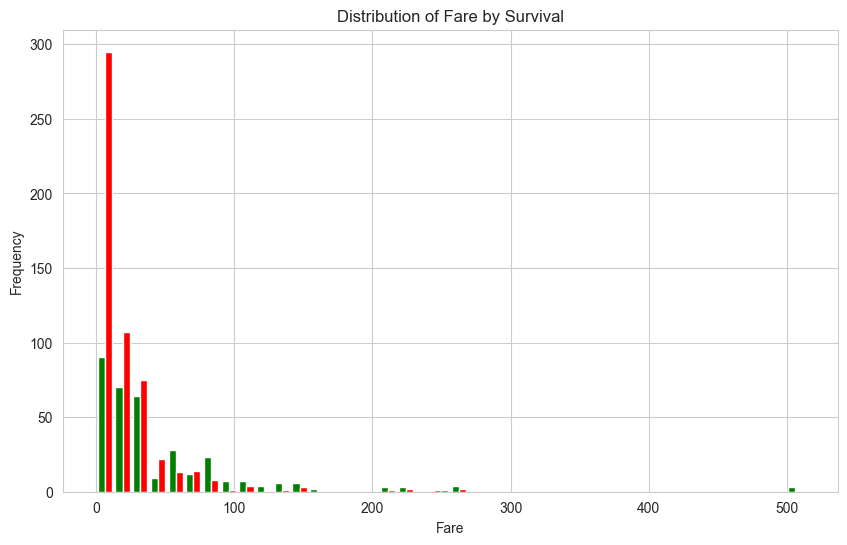

In [73]:
survived_fare=training_data[training_data["Survived"]==1]['Fare']
not_survived_fare=training_data[training_data['Survived']==0]['Fare']

plt.figure(figsize=(10,6))
plt.hist([survived_fare,not_survived_fare],bins=40,color=['green','red'],label=['survived','not_survived'])
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival')
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

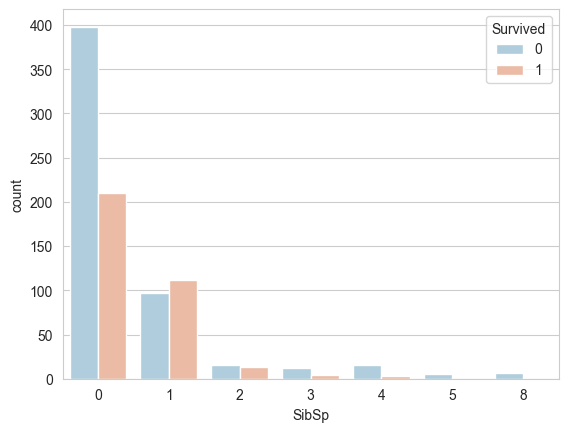

In [74]:
sns.countplot(x='SibSp',hue='Survived',palette='RdBu_r',data=training_data)

Checking for missing values

<Axes: >

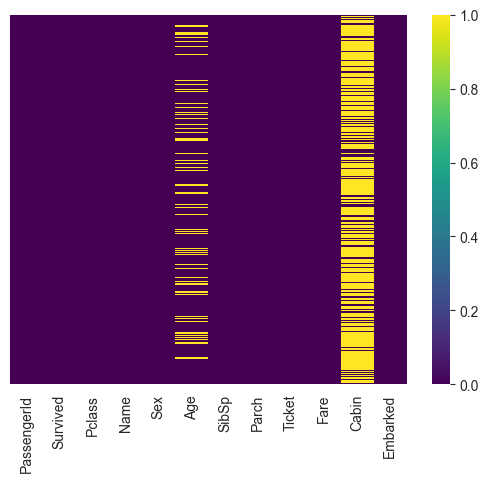

In [75]:
sns.heatmap(training_data.isnull(),yticklabels=False,cmap=('viridis'))

<Axes: >

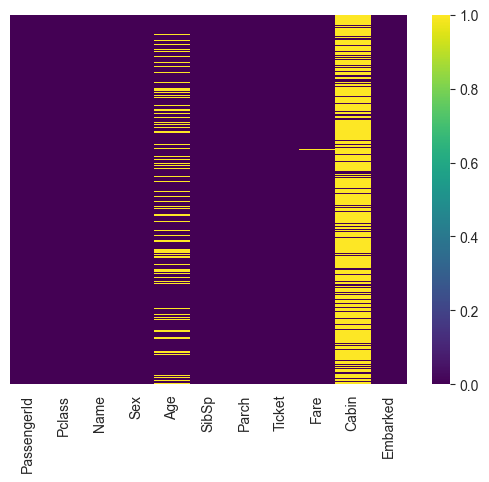

In [76]:
sns.heatmap(test_data.isnull(),yticklabels=False,cmap=('viridis'))

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
def add_title_and_encode(data):
    # Extract titles using a raw string for the regex pattern
    data['Title'] = data.Name.str.extract(r' ([A-Za-z]+)\.', expand=False)
    data.Title = data.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data.Title = data.Title.replace('Mlle', 'Miss')
    data.Title = data.Title.replace('Ms', 'Miss')
    data.Title = data.Title.replace('Mme', 'Mrs')
    
    # Apply OneHotEncoder to the 'Title' column
    encoder_title = OneHotEncoder(sparse_output=False, drop='first')
    title_encoded = encoder_title.fit_transform(data[['Title']])
    
    # Create a DataFrame with the encoded columns and appropriate column names
    title_encoded_df = pd.DataFrame(title_encoded, columns=encoder_title.get_feature_names_out(['Title'])).astype(int)

     # Concatenate the original data with the new one-hot-encoded columns
    data = pd.concat([data, title_encoded_df], axis=1)
    
    # Drop the original 'Title' column
    data.drop('Title', axis=1, inplace=True)
    
    # Apply OneHotEncoder to the 'Embarked' column
    encoder_embarked = OneHotEncoder(sparse_output=False, drop='first')
    embarked_encoded = encoder_embarked.fit_transform(data[['Embarked']])
    
    # Create a DataFrame with the encoded columns and appropriate column names
    embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder_embarked.get_feature_names_out(['Embarked'])).astype(int)
    
    # Concatenate the original data with the new one-hot-encoded columns
    data = pd.concat([data, embarked_encoded_df], axis=1)

     # Apply OneHotEncoder to the 'Sex' column
    encoder_Sex = OneHotEncoder(sparse_output=False, drop='first')
    Sex_encoded = encoder_Sex.fit_transform(data[['Sex']])
    
    # Create a DataFrame with the encoded columns and appropriate column names
    Sex_encoded_df = pd.DataFrame(Sex_encoded, columns=encoder_Sex.get_feature_names_out(['Sex'])).astype(int)
    
    # Concatenate the original data with the new one-hot-encoded columns
    data = pd.concat([data, Sex_encoded_df], axis=1)
    
    # Apply OneHotEncoder to the 'Pclass' column
    encoder_Pclass = OneHotEncoder(sparse_output=False, drop='first')
    Pclass_encoded = encoder_Pclass.fit_transform(data[['Pclass']])


     # Create a DataFrame with the encoded columns and appropriate column names
    Pclass_encoded_df = pd.DataFrame(Pclass_encoded, columns=encoder_Pclass.get_feature_names_out(['Pclass'])).astype(int)
    
    # Concatenate the original data with the new one-hot-encoded columns for Pclass
    data = pd.concat([data, Pclass_encoded_df], axis=1)
    
    # Drop the original 'Sex', 'Pclass', 'Embarked', and other unnecessary columns
    data.drop(['Sex', 'Pclass', 'Embarked', 'Name', 'PassengerId','Cabin','Ticket','Age'], axis=1, inplace=True)
    
    return data

In [79]:
training_data=add_title_and_encode(training_data)
test_data=add_title_and_encode(test_data)

In [80]:
test_data.head()

,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,0,7.8292,0,1,0,0,1,0,1,0,1
1,1,0,7.0000,0,0,1,0,0,1,0,0,1
2,0,0,9.6875,0,1,0,0,1,0,1,1,0
3,0,0,8.6625,0,1,0,0,0,1,1,0,1
4,1,1,12.2875,0,0,1,0,0,1,0,0,1


In [81]:
training_data.head()

,Survived,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,1,0,0,0,1,1,0,1
1,1,1,0,71.2833,0,0,1,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,0,1,0,0,1
3,1,1,0,53.1000,0,0,1,0,0,1,0,0,0
4,0,0,0,8.0500,0,1,0,0,0,1,1,0,1



Filling missing values

In [82]:
test_data['Fare'] = test_data['Fare'].fillna(np.mean(test_data['Fare']))
training_data['Fare'] = training_data['Fare'].fillna(np.mean(training_data['Fare']))

In [83]:
def add_features(data):
    # Family Size
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 1
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0

    data['FarePerPerson'] = data['Fare'] / data['FamilySize']
    data.drop('Fare', axis=1, inplace=True)
    
    return data

training_data = add_features(training_data)
test_data = add_features(test_data)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13208\1878749311.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['IsAlone'].loc[data['FamilySize'] > 1] = 0
C:\Users\Dell\AppData\Local\Temp\ipykernel_13208\1878749311.py:5: SettingWithCopy

<Axes: >

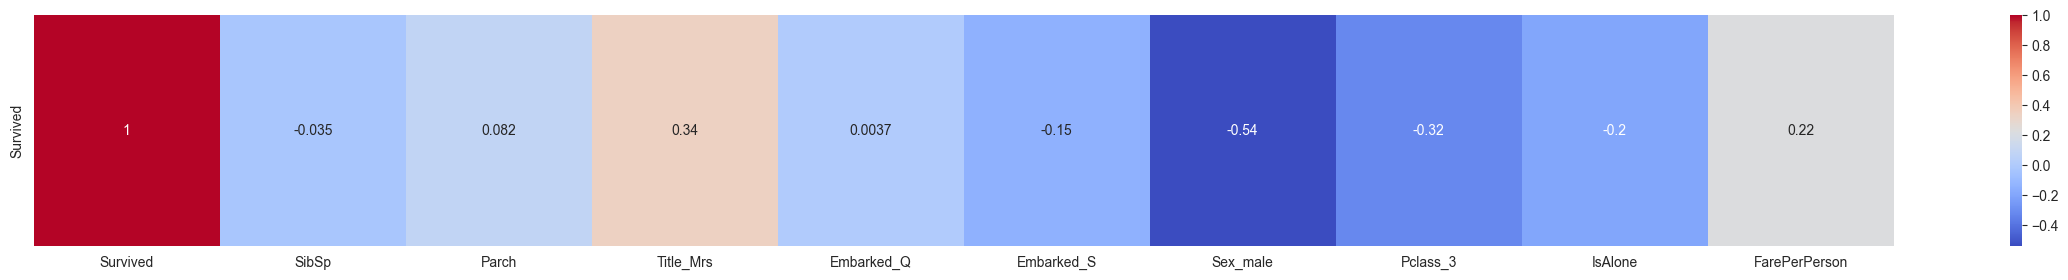

In [84]:
training_data.drop(['Title_Rare','FamilySize','Title_Mr','Pclass_2','Title_Miss'], axis=1, inplace=True)
test_data.drop(['Title_Rare','FamilySize','Title_Mr','Pclass_2','Title_Miss'], axis=1, inplace=True)
plt.figure(figsize=(30,3))
sns.heatmap(training_data.corr()[0:1],annot=True,cmap="coolwarm")

In [ ]:
training_data.head()